<a href="https://colab.research.google.com/github/Jagadishchandra17/Deep-Neural-Network-for-Breast-Cancer-Classification-using-pytorch/blob/main/Deep_Neural_Network_for_Breast_Cancer_Classification_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Neural Network for Breast Cancer Classification using pytorch**

This project leverages PyTorch, an open-source machine learning library developed by FAIR, to build and train a deep neural network for classifying breast cancer using the Wisconsin (Diagnostic) dataset. PyTorch's versatility allows for the development of complex models, facilitating both research experimentation and production deployment, as demonstrated in this classification task.

## loading the dataset

The Breast Cancer Wisconsin (Diagnostic) dataset, a widely recognized resource for classification problems, comprises 569 samples characterized by 30 features, each representing breast cancer cell attributes. This dataset distinguishes between benign and malignant tumors, presenting a binary classification challenge. Freely available under the Creative Commons Attribution 4.0 International license, it serves as an excellent benchmark for machine learning models. We begin by loading this dataset to explore its structure and prepare it for analysis.

In [ ]:
%pip install ucimlrepo==0.0.7

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# print the first few rows of the data
display(X.head())

# print the first few rows of the target
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:
display(f'X shape: {X.shape}')
display(f'y shape: {y.shape}')

'X shape: (569, 30)'

'y shape: (569, 1)'

As we can see, the dataset has 569 samples and 30 features. The target variable is the diagnosis column, which contains the class labels for each sample. The class labels are either 'M' (malignant) or 'B' (benign)

In [ ]:
display(y['Diagnosis'].value_counts())

,count
Diagnosis,
B,357
M,212


Note that the dataset is **imbalanced**, with more benign samples than malignant samples.

We will now process the data. Randomly choose 200 samples in 'M' (malignant) and 200 samples in 'B' (benign).

In [ ]:
import pandas as pd

# Combine features and target into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Separate the two classes
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

# Select 200 samples from each class
data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)

# Combine the two classes
balanced_data = pd.concat([data_B, data_M])

display(balanced_data['Diagnosis'].value_counts())

,count
Diagnosis,
B,200
M,200


There are 200 samples in each class, with a total of 400 samples. It means that the dataset is balanced.

We will use 80% of the samples for training and 20% for testing.

## Data Preprocessing

In [ ]:
##splitting the data into training and test sets, and standardizing the feature values.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separate features and targets
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Convert the targets to binary labels
y = y.map({'B': 0, 'M': 1})

display(X)
display(y)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701


,Diagnosis
395,0
110,0
481,0
493,0
136,0
...,...
257,1
328,1
199,1
194,1


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (320, 30)'

'y_train shape: (320,)'

'X_test shape: (80, 30)'

'y_test shape: (80,)'

To ensure optimal model performance and training efficiency, we standardize the feature values using scikit-learn's StandardScaler. This process transforms the data, centering it around zero and scaling it to unit variance, thereby mitigating the influence of varying feature scales. Standardization is performed in three steps: first, the StandardScaler is fitted to the training data to calculate the mean and standard deviation of each feature; second, these parameters are used to transform the training data; and third, the same transformation is applied to the test data, maintaining consistency across datasets. This ensures that all features contribute equally to the model's learning process. Following standardization, the resulting NumPy arrays are converted to PyTorch tensors, preparing the data for neural network training.

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Standardize the data
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

## Build and Train the Neural Network Model

We will define our neural network architecture, specify the loss function and optimizer, and then train the model.

First, we define the neural network architecture using the `nn.Module` class in PyTorch. Our model consists of an input layer, one hidden layer, and an output layer with 2 neurons corresponding to the 2 classes.

Below is an example of the neural network model, it has 8 neurons in the input layer, 8 neurons in the hidden layer, and 2 neurons in the output layer.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/j-MFHvfzhrY04qVMsClOGA/8-8-2.jpg" alt="image" width="50%">


In [ ]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

In [ ]:
# Let us visualize the neural network architecture.

print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


Then we define the loss function and optimizer. We use the `CrossEntropyLoss` loss function, which is commonly used for multi-class classification problems. The `Adam` optimizer is used to update the weights of the neural network during training.

In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Then we can train the model using the training data. We iterate over the training data for a specified number of epochs and update the weights of the neural network using backpropagation.

During training, we calculate the loss at each epoch and print it to monitor the training progress. The loss should **decrease** over time as the model learns to classify the classes correctly.

Finally, we evaluate the model on the test data to see how well it performs on unseen data.

In [ ]:
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.2795, Test Loss: 0.1984
Epoch [2/10], Train Loss: 0.1194, Test Loss: 0.1502
Epoch [3/10], Train Loss: 0.0915, Test Loss: 0.1256
Epoch [4/10], Train Loss: 0.0812, Test Loss: 0.1195
Epoch [5/10], Train Loss: 0.0720, Test Loss: 0.1158
Epoch [6/10], Train Loss: 0.0661, Test Loss: 0.1100
Epoch [7/10], Train Loss: 0.0613, Test Loss: 0.1072
Epoch [8/10], Train Loss: 0.0548, Test Loss: 0.1051
Epoch [9/10], Train Loss: 0.0527, Test Loss: 0.1048
Epoch [10/10], Train Loss: 0.0469, Test Loss: 0.0982


## Visualizing the Training and Test Loss

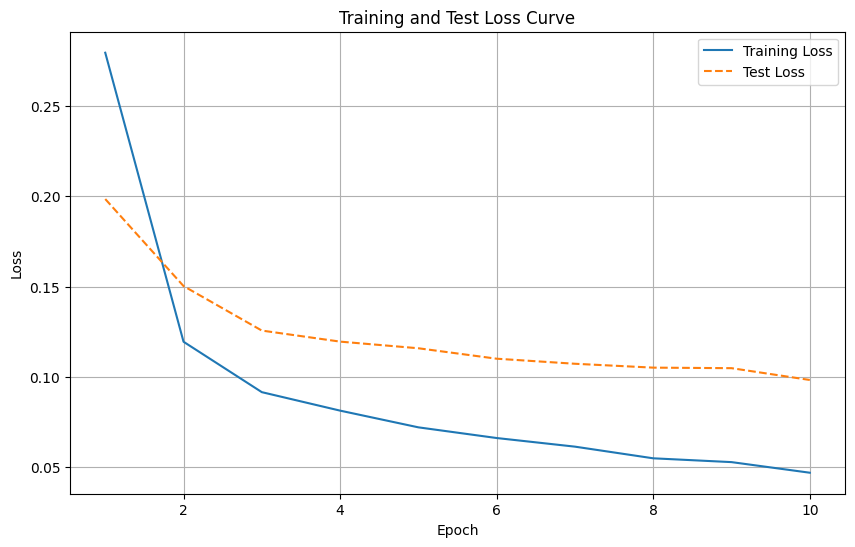

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

The graph displays the training and test loss curves over 10 epochs, showing a consistent decrease in both losses, indicating successful model learning. The training loss decreases more rapidly than the test loss, suggesting the model fits the training data well. While the test loss also decreases, it levels off, implying the model's generalization ability stabilizes after a few epochs. Overall, the graph indicates a well-trained model with good convergence and reasonable generalization.

## Using a different optimizer: SGD

Stochastic Gradient Descent (SGD) is a widely used optimization algorithm in machine learning and deep learning for training models. It is an iterative method for optimizing a loss function by making small updates to the model parameters in the direction of the negative gradient.

**How SGD Works**

SGD updates the model's parameters iteratively. The update rule for each parameter $\theta$ is as follows:

$$ \theta = \theta - \eta \cdot \nabla_\theta J(\theta) $$

where:
- $\theta$ represents the model parameters.
- $\eta$ (eta) is the learning rate, which controls the step size of each update.
- $\nabla_\theta J(\theta)$ is the gradient of the loss function with respect to the parameter $\theta$.


**PyTorch's `torch.optim.SGD`**

In PyTorch, the `torch.optim.SGD` optimizer provides several parameters to configure its behavior.

**Parameters**

1. **`params`**:
   - The model parameters to optimize.
   - Typically provided as `model.parameters()`.

2. **`lr` (learning rate)**:
   - A positive float value that controls the step size for each parameter update.
   - Example: `lr=0.01`.

3. **`momentum`** (optional):
   - A float value that accelerates SGD in the relevant direction and dampens oscillations.
   - Example: `momentum=0.9`.

4. **`weight_decay`** (optional):
   - A float value representing the L2 penalty (regularization term) to prevent overfitting.
   - Example: `weight_decay=0.0001`.

5. **`dampening`** (optional):
   - A float value that reduces the effect of the momentum.
   - Default is `0`.

In [ ]:
import torch.optim as optim

model_new_optimizer = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_new_optimizer.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new_optimizer.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new_optimizer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model_new_optimizer.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new_optimizer(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')



Epoch [1/10], Train Loss: 0.3938, Test Loss: 0.2786
Epoch [2/10], Train Loss: 0.1867, Test Loss: 0.2048
Epoch [3/10], Train Loss: 0.1377, Test Loss: 0.1786
Epoch [4/10], Train Loss: 0.1158, Test Loss: 0.1612
Epoch [5/10], Train Loss: 0.1033, Test Loss: 0.1506
Epoch [6/10], Train Loss: 0.0947, Test Loss: 0.1427
Epoch [7/10], Train Loss: 0.0888, Test Loss: 0.1354
Epoch [8/10], Train Loss: 0.0843, Test Loss: 0.1295
Epoch [9/10], Train Loss: 0.0811, Test Loss: 0.1259
Epoch [10/10], Train Loss: 0.0782, Test Loss: 0.1231


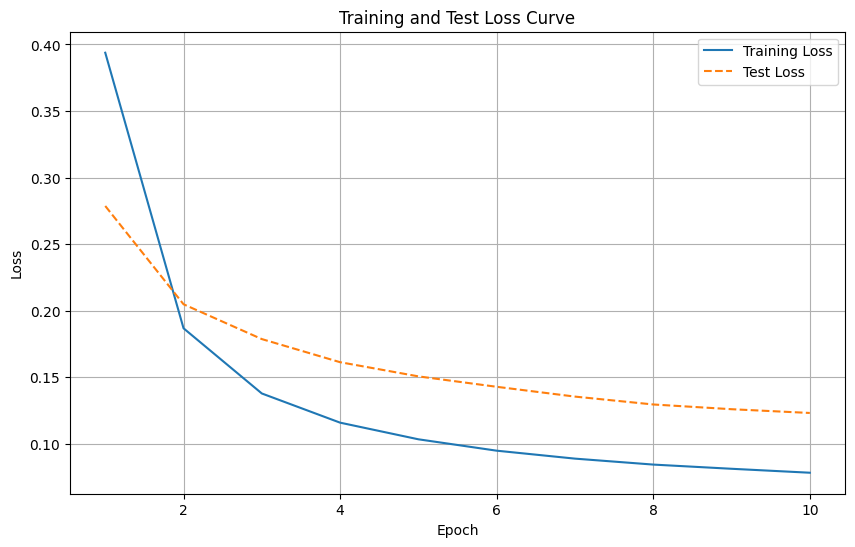

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

This loss curve, generated using the SGD optimizer, exhibits a typical gradual decline in both training and test loss over 10 epochs, indicating a steady but potentially slower learning process compared to optimizers like Adam. The consistent gap between the training and test loss suggests the model is generalizing reasonably well, but the slower convergence might necessitate more epochs or learning rate tuning. Notably, the smoother, less erratic descent compared to the Adam optimizer's potential for more rapid but sometimes unstable convergence highlights SGD's characteristic stability. In contrast, an Adam-optimized curve would likely show a steeper initial decline and possibly more fluctuations, reflecting its adaptive learning rate behavior, which can lead to faster convergence but also risks overshooting optimal values.

### Defining a new neural network architecture with different neurons and see how it affects the model's performance.

Epoch [1/10], Train Loss: 0.4191, Test Loss: 0.2823
Epoch [2/10], Train Loss: 0.1808, Test Loss: 0.1945
Epoch [3/10], Train Loss: 0.1284, Test Loss: 0.1524
Epoch [4/10], Train Loss: 0.1058, Test Loss: 0.1308
Epoch [5/10], Train Loss: 0.0924, Test Loss: 0.1219
Epoch [6/10], Train Loss: 0.0843, Test Loss: 0.1155
Epoch [7/10], Train Loss: 0.0789, Test Loss: 0.1103
Epoch [8/10], Train Loss: 0.0748, Test Loss: 0.1074
Epoch [9/10], Train Loss: 0.0699, Test Loss: 0.1037
Epoch [10/10], Train Loss: 0.0678, Test Loss: 0.1008


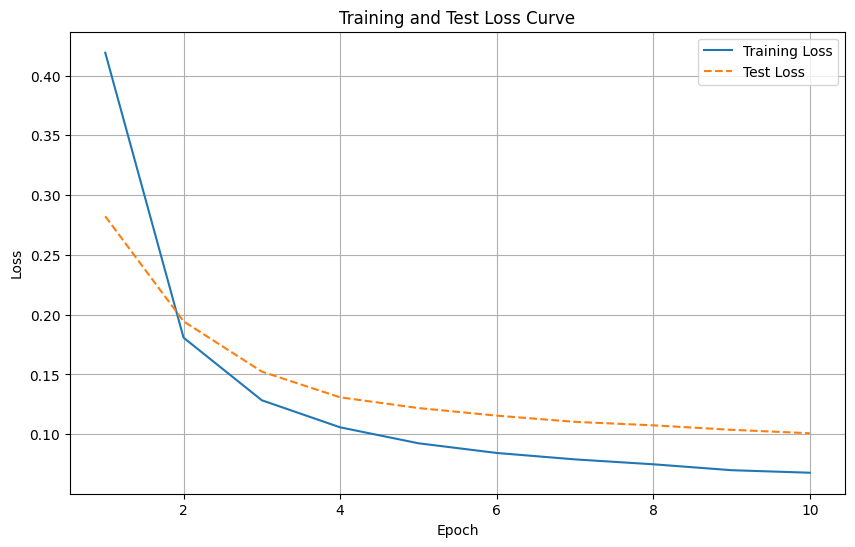

In [ ]:
# Change the number of hidden units, e.g. 16.
model_new = ClassificationNet(input_units=30, hidden_units=16, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model_new.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()